In [1]:
import pandas as pd 
from skimage import io
data=pd.read_csv('C:/Users/ysp/Desktop/Deep Learning/a943287.csv')
data.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,please_select_the_gender_of_the_person_in_the_picture,please_select_the_gender_of_the_person_in_the_picture:confidence,image_url,please_select_the_gender_of_the_person_in_the_picture_gold,user_id
0,1023132475,False,finalized,1,8/19/2016 17:00:25,male,1.0,https://d1qb2nb5cznatu.cloudfront.net/users/40...,NaN,40
1,1023132476,False,finalized,1,8/19/2016 17:00:48,male,1.0,https://d1qb2nb5cznatu.cloudfront.net/users/42...,NaN,42
2,1023132477,False,finalized,1,8/19/2016 17:01:43,male,1.0,https://d1qb2nb5cznatu.cloudfront.net/users/44...,NaN,44
3,1023132478,False,finalized,1,8/19/2016 17:01:04,male,1.0,https://d1qb2nb5cznatu.cloudfront.net/users/47...,NaN,47
4,1023132479,False,finalized,1,8/19/2016 17:00:48,male,1.0,https://d1qb2nb5cznatu.cloudfront.net/users/50...,NaN,50


In [2]:
data_male=data[data['please_select_the_gender_of_the_person_in_the_picture']=='male']
data_female=data[data['please_select_the_gender_of_the_person_in_the_picture']=='female']
final_data=pd.concat([data_male[:1000],data_female[:1000]], axis=0).reset_index(drop=True)
final_data.shape

(2000, 10)

In [3]:
x=[]
y=[]
for i in range(final_data.shape[0]):
    try:
        image=io.imread(final_data.loc[i]['image_url'])
        if (image.shape==(300,300,3)):
            x.append(image)
            y.append(final_data.loc[i]['please_select_the_gender_of_the_person_in_the_picture'])
    except:
        continue

In [4]:
!pip install opencv-python
import cv2
import numpy as np
x2=[]
y2=[]
for i in range(len(x)):
    img2=cv2.resize(x[i],(50,50))
    x2.append(img2)
    img_label=np.where(y[i]=='male',1,0)
    y2.append(img_label)

In [5]:
x2=np.array(x2)
print(x2.shape)
y1=np.array(y2)
x1=x2.astype('float32')/255.

(1745, 50, 50, 3)


In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.1,random_state=1, stratify=y)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(1570, 50, 50, 3) (175, 50, 50, 3) (1570,) (175,)


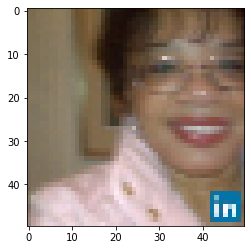

In [8]:
import matplotlib.pyplot as plt
plt.imshow(x_train[1])
plt.show()

In [9]:
from keras.layers import Conv2D, MaxPooling2D,Flatten,Dense
from keras.models import Sequential
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=[50,50,3]))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(256,(3,3),activation='relu',padding='same'))
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 6, 6, 256)        

In [10]:
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['acc'])
result=model.fit(x_train,y_train,batch_size=32,epochs=30,validation_data=(x_test,y_test))
score=model.evaluate(x_test,y_test)
print(score)

Train on 1570 samples, validate on 175 samples
Epoch 1/30
1570/1570 [==============================] - 3s 2ms/step - loss: 0.6758 - acc: 0.5917 - val_loss: 0.6334 - val_acc: 0.6514
Epoch 2/30
1570/1570 [==============================] - 2s 2ms/step - loss: 0.5949 - acc: 0.6841 - val_loss: 0.6277 - val_acc: 0.6514
Epoch 3/30
1570/1570 [==============================] - 2s 1ms/step - loss: 0.5277 - acc: 0.7318 - val_loss: 0.5466 - val_acc: 0.7200
Epoch 4/30
1570/1570 [==============================] - 2s 1ms/step - loss: 0.4738 - acc: 0.7618 - val_loss: 0.5384 - val_acc: 0.7257
Epoch 5/30
1570/1570 [==============================] - 2s 1ms/step - loss: 0.4068 - acc: 0.8089 - val_loss: 0.4852 - val_acc: 0.7657
Epoch 6/30
1570/1570 [==============================] - 2s 1ms/step - loss: 0.3450 - acc: 0.8478 - val_loss: 0.4742 - val_acc: 0.7657
Epoch 7/30
1570/1570 [==============================] - 2s 1ms/step - loss: 0.2865 - acc: 0.8790 - val_loss: 0.5484 - val_acc: 0.7657
Epoch 8/30
1570

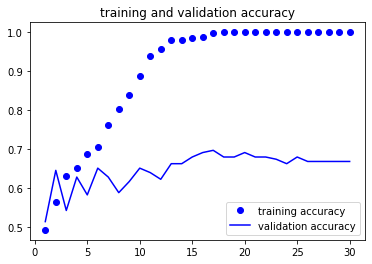

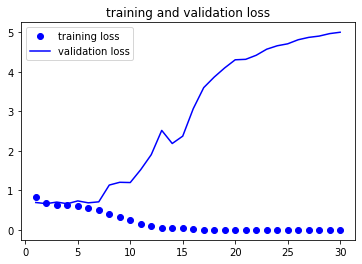

In [15]:
import matplotlib.pyplot as plt
acc=result.history['acc']
val_acc=result.history['val_acc']
loss=result.history['loss']
val_loss=result.history['val_loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label='training accuracy')
plt.plot(epochs, val_acc,'b',label='validation accuracy')
plt.title('training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'bo',label='training loss')
plt.plot(epochs, val_loss,'b',label='validation loss')
plt.title('training and validation loss')
plt.legend()
plt.show()

In [14]:
import cv2
import numpy as np
x4=[]
y4=[]
for i in range(len(x)):
    img2=cv2.resize(x[i],(300,300))
    x4.append(img2)
    img_label=np.where(y[i]=='male',1,0)
    y4.append(img_label)
x4=np.array(x4)
print(x4.shape)
y3=np.array(y4)
x3=x4.astype('float32')/255.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x3,y3,test_size=0.1,random_state=1, stratify=y)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)
from keras.layers import Conv2D, MaxPooling2D,Flatten,Dense
from keras.models import Sequential
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=[300,300,3]))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(256,(3,3),activation='relu',padding='same'))
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['acc'])
result=model.fit(x_train,y_train,batch_size=32,epochs=30,validation_data=(x_test,y_test))
score=model.evaluate(x_test,y_test)
print(score)

(1745, 300, 300, 3)
(1570, 300, 300, 3) (175, 300, 300, 3) (1570,) (175,)
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 298, 298, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 149, 149, 64)      18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 74, 74, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 37, 37, 128)       0         
______________________________________________

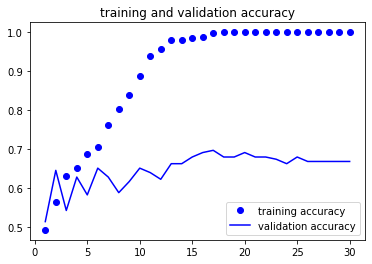

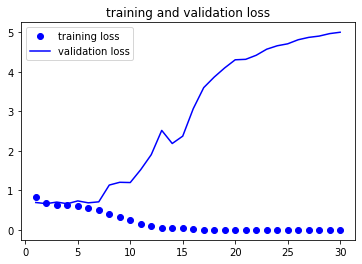

In [16]:
import matplotlib.pyplot as plt
acc=result.history['acc']
val_acc=result.history['val_acc']
loss=result.history['loss']
val_loss=result.history['val_loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label='training accuracy')
plt.plot(epochs, val_acc,'b',label='validation accuracy')
plt.title('training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'bo',label='training loss')
plt.plot(epochs, val_loss,'b',label='validation loss')
plt.title('training and validation loss')
plt.legend()
plt.show()

In [17]:
from keras.applications import VGG16
vgg16_model=VGG16(weights='imagenet',include_top=False,input_shape=(300,300,3))
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 300, 300, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 300, 300, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 300, 300, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 150, 150, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 150, 150, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 150, 150, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 75, 75, 128)       0     

In [20]:
import cv2
from keras.applications.vgg16 import preprocess_input
x5_vgg16=[]
y5=[]
for i in range(len(x)):
    img=x[i]
    img=preprocess_input(img.reshape(1,300,300,3))
    img_new=vgg16_model.predict(img)
    x5_vgg16.append(img_new)
    img_label=np.where(y[i]=='male',1,0)
    y5.append(img_label)

In [22]:
x5_vgg16=np.array(x5_vgg16)
print(x5_vgg16.shape)
x5_vgg16=x5_vgg16.reshape(x5_vgg16.shape[0],x5_vgg16.shape[2],x5_vgg16.shape[3],x5_vgg16.shape[4])
y5=np.array(y5)

(1745, 1, 9, 9, 512)


In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x5_vgg16,y5,test_size=0.1,random_state=1, stratify=y5)


In [24]:
from keras.layers import Conv2D, MaxPooling2D,Flatten,Dense,Flatten, Dropout
from keras.models import Sequential
modelvgg16=Sequential()
modelvgg16.add(Conv2D(512,(3,3),activation='relu',input_shape=(x_train.shape[1],x_train.shape[2],x_train.shape[3])))
modelvgg16.add(MaxPooling2D((2,2)))
modelvgg16.add(Flatten())
modelvgg16.add(Dense(512,activation='relu'))
modelvgg16.add(Dropout(0.5))
modelvgg16.add(Dense(1,activation='sigmoid'))
modelvgg16.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 7, 7, 512)         2359808   
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 3, 3, 512)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               2359808   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 513       
Total params: 4,720,129
Trainable params: 4,720,129
Non-trainable params: 0
____________________________________________

In [25]:
modelvgg16.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history_vgg16=modelvgg16.fit(x_train/np.max(x_train),y_train,batch_size=32,epochs=20,validation_data=(x_test/np.max(x_train),y_test))

Train on 1570 samples, validate on 175 samples
Epoch 1/20
1570/1570 [==============================] - 4s 3ms/step - loss: 0.4168 - accuracy: 0.8153 - val_loss: 0.2452 - val_accuracy: 0.9200
Epoch 2/20
1570/1570 [==============================] - 4s 3ms/step - loss: 0.1572 - accuracy: 0.9382 - val_loss: 0.2369 - val_accuracy: 0.9314
Epoch 3/20
1570/1570 [==============================] - 4s 3ms/step - loss: 0.0575 - accuracy: 0.9828 - val_loss: 0.3223 - val_accuracy: 0.9143
Epoch 4/20
1570/1570 [==============================] - 4s 3ms/step - loss: 0.0197 - accuracy: 0.9968 - val_loss: 0.3431 - val_accuracy: 0.9200
Epoch 5/20
1570/1570 [==============================] - 4s 3ms/step - loss: 0.0068 - accuracy: 1.0000 - val_loss: 0.4181 - val_accuracy: 0.9143
Epoch 6/20
1570/1570 [==============================] - 4s 3ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.4258 - val_accuracy: 0.9086
Epoch 7/20
1570/1570 [==============================] - 4s 3ms/step - loss: 0.0013 - accu

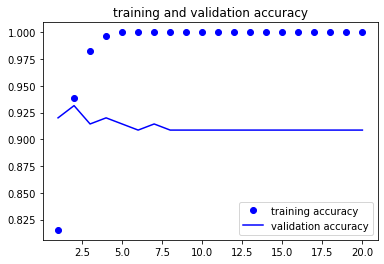

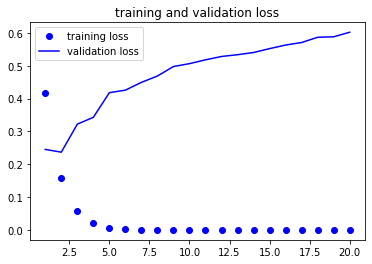

In [27]:
import matplotlib.pyplot as plt
acc=history_vgg16.history['accuracy']
val_acc=history_vgg16.history['val_accuracy']
loss=history_vgg16.history['loss']
val_loss=history_vgg16.history['val_loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label='training accuracy')
plt.plot(epochs, val_acc,'b',label='validation accuracy')
plt.title('training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'bo',label='training loss')
plt.plot(epochs, val_loss,'b',label='validation loss')
plt.title('training and validation loss')
plt.legend()
plt.show()